In [1]:
!nvidia-smi

Sun Feb 18 16:57:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
HOME = '/content/drive/MyDrive/yolo2'
print(HOME)

/content/drive/MyDrive/yolo2


In [4]:
# Pip install method

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (8 CPUs, 51.0 GB RAM, 26.3/166.8 GB disk)


In [ ]:
# Git clone method

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [6]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="1yoJXD1rfYZYFTaqKyvh")
project = rf.workspace("sg-t3kgv").project("yolo1-7mbb7")
dataset = project.version(2).download("yolov8")



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 8.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycle

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to yolo1-2 in yolov8:: 100%|██████████| 4888/4888 [00:00<00:00, 8612.68it/s]


## Custom Training

In [7]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True show_labels=False show_conf=False

/content/drive/MyDrive/yolo2
100% 21.5M/21.5M [00:00<00:00, 251MB/s]
New https://pypi.org/project/ultralytics/8.1.15 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/yolo1-2/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=False, show_conf=False, vid

In [8]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1708235962.c892259a4853.1680.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1935.jpg  val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch1936.jpg  val_batch2_pred.jpg
labels.jpg					    train_batch1937.jpg  weights
P_curve.png					    train_batch1.jpg
PR_curve.png					    train_batch2.jpg


/content/drive/MyDrive/yolo2


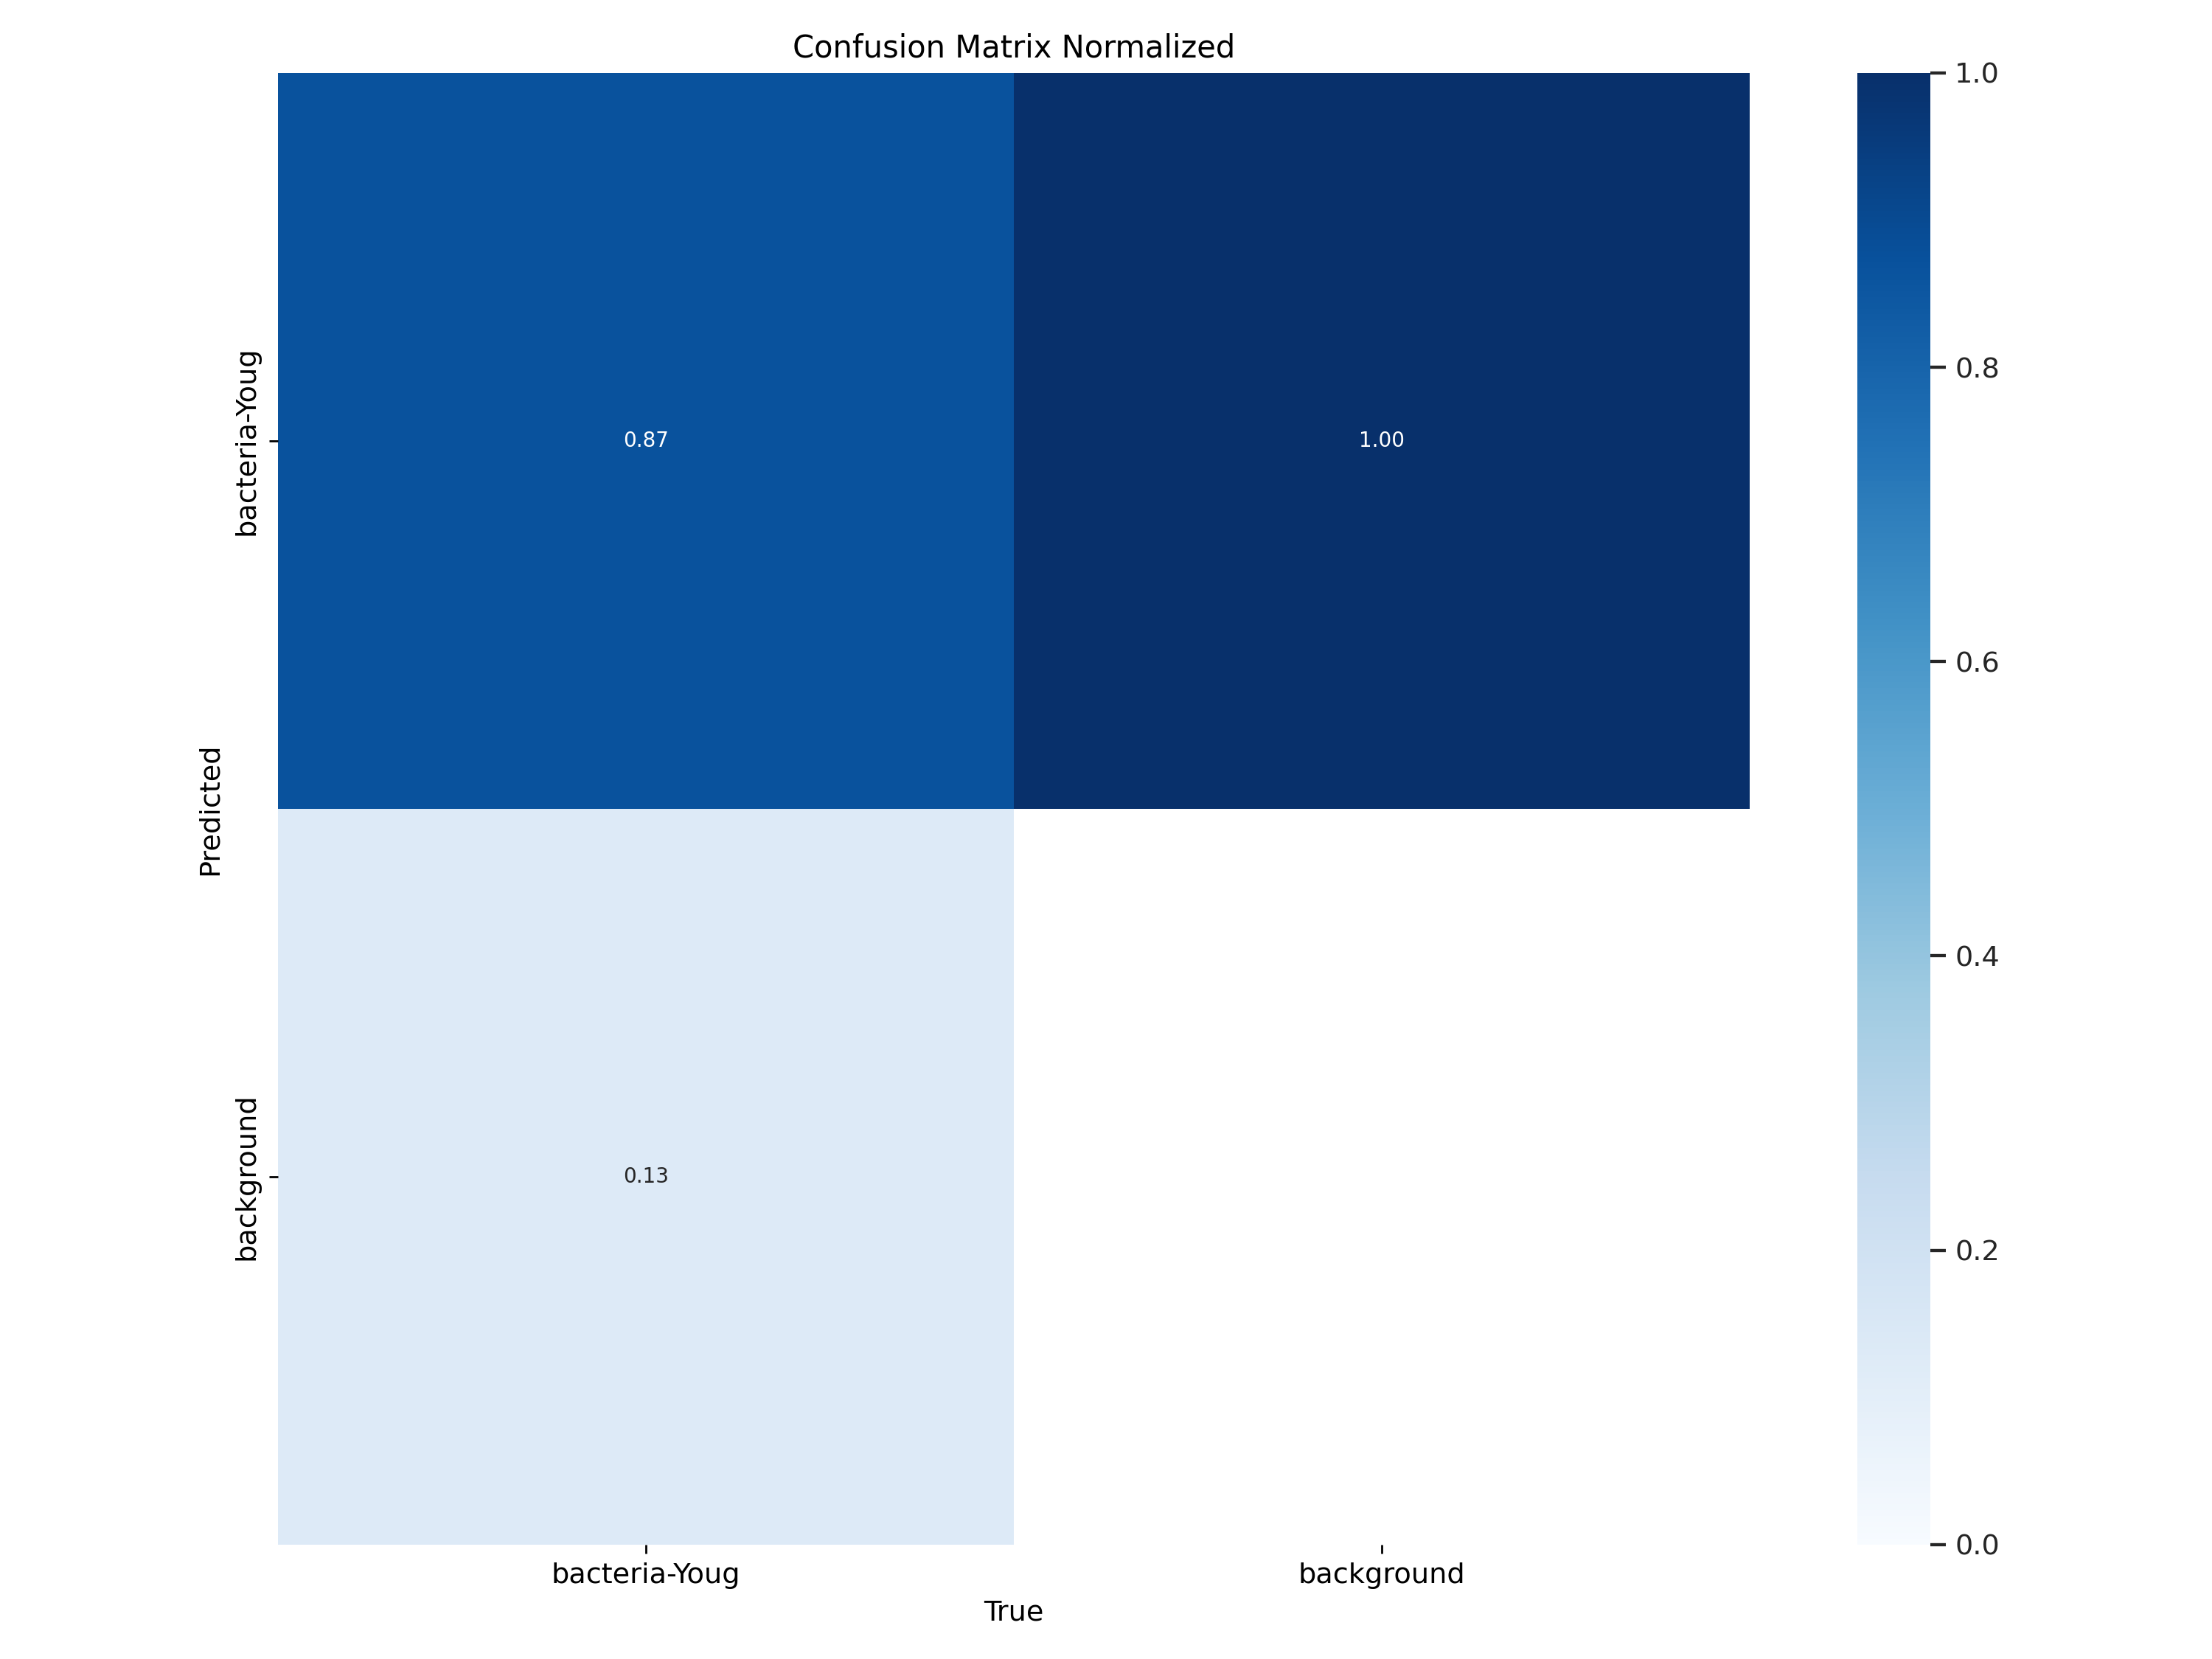

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix_normalized.png', width=600)

/content/drive/MyDrive/yolo2


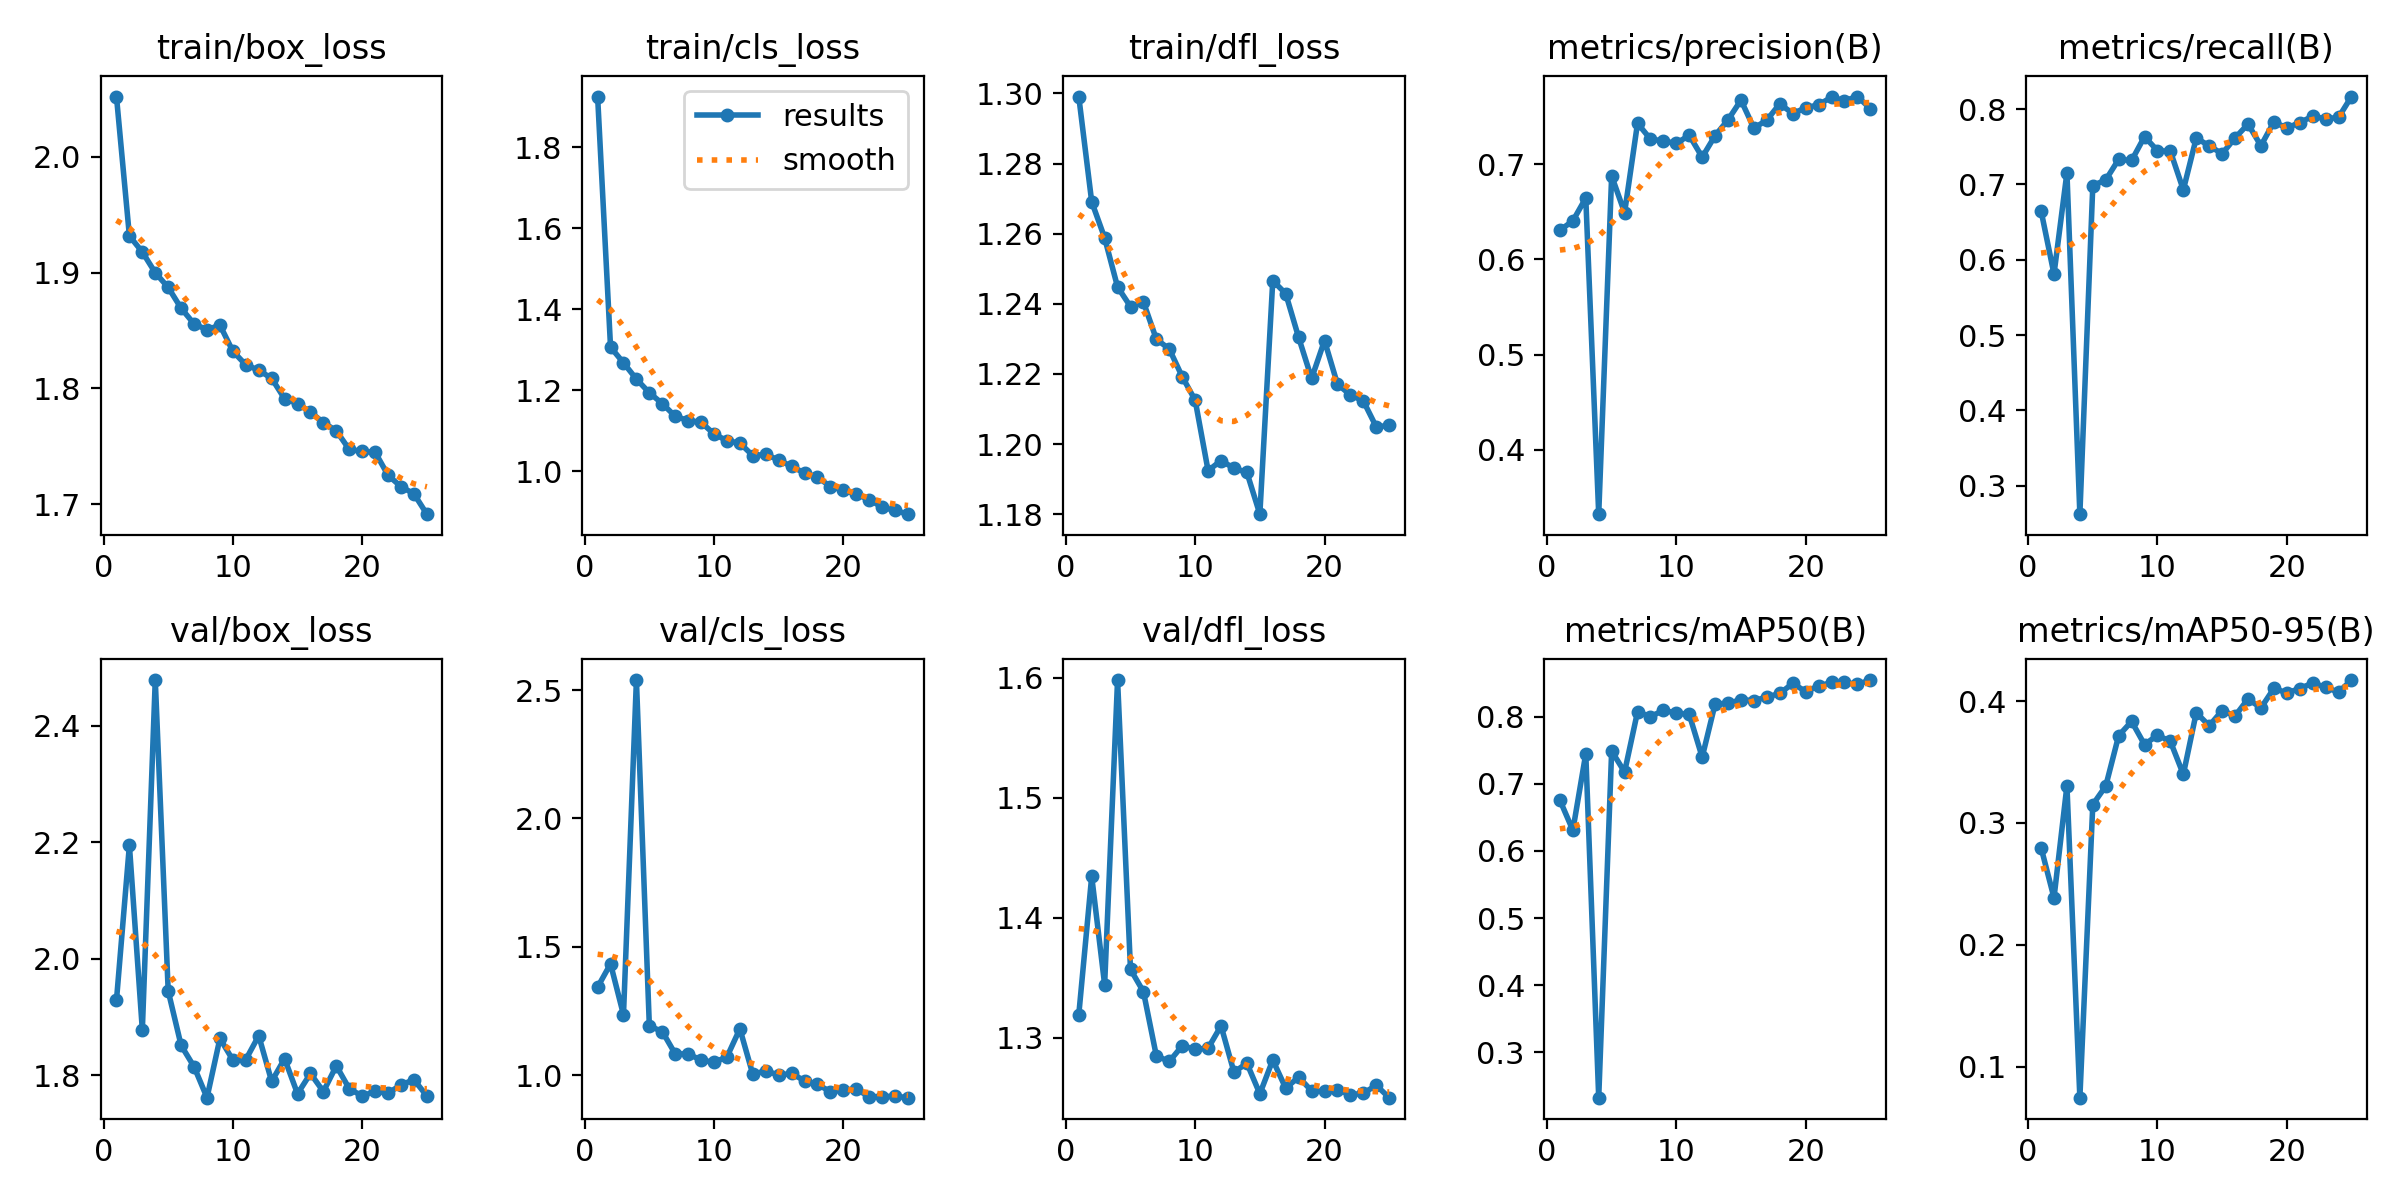

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content/drive/MyDrive/yolo2


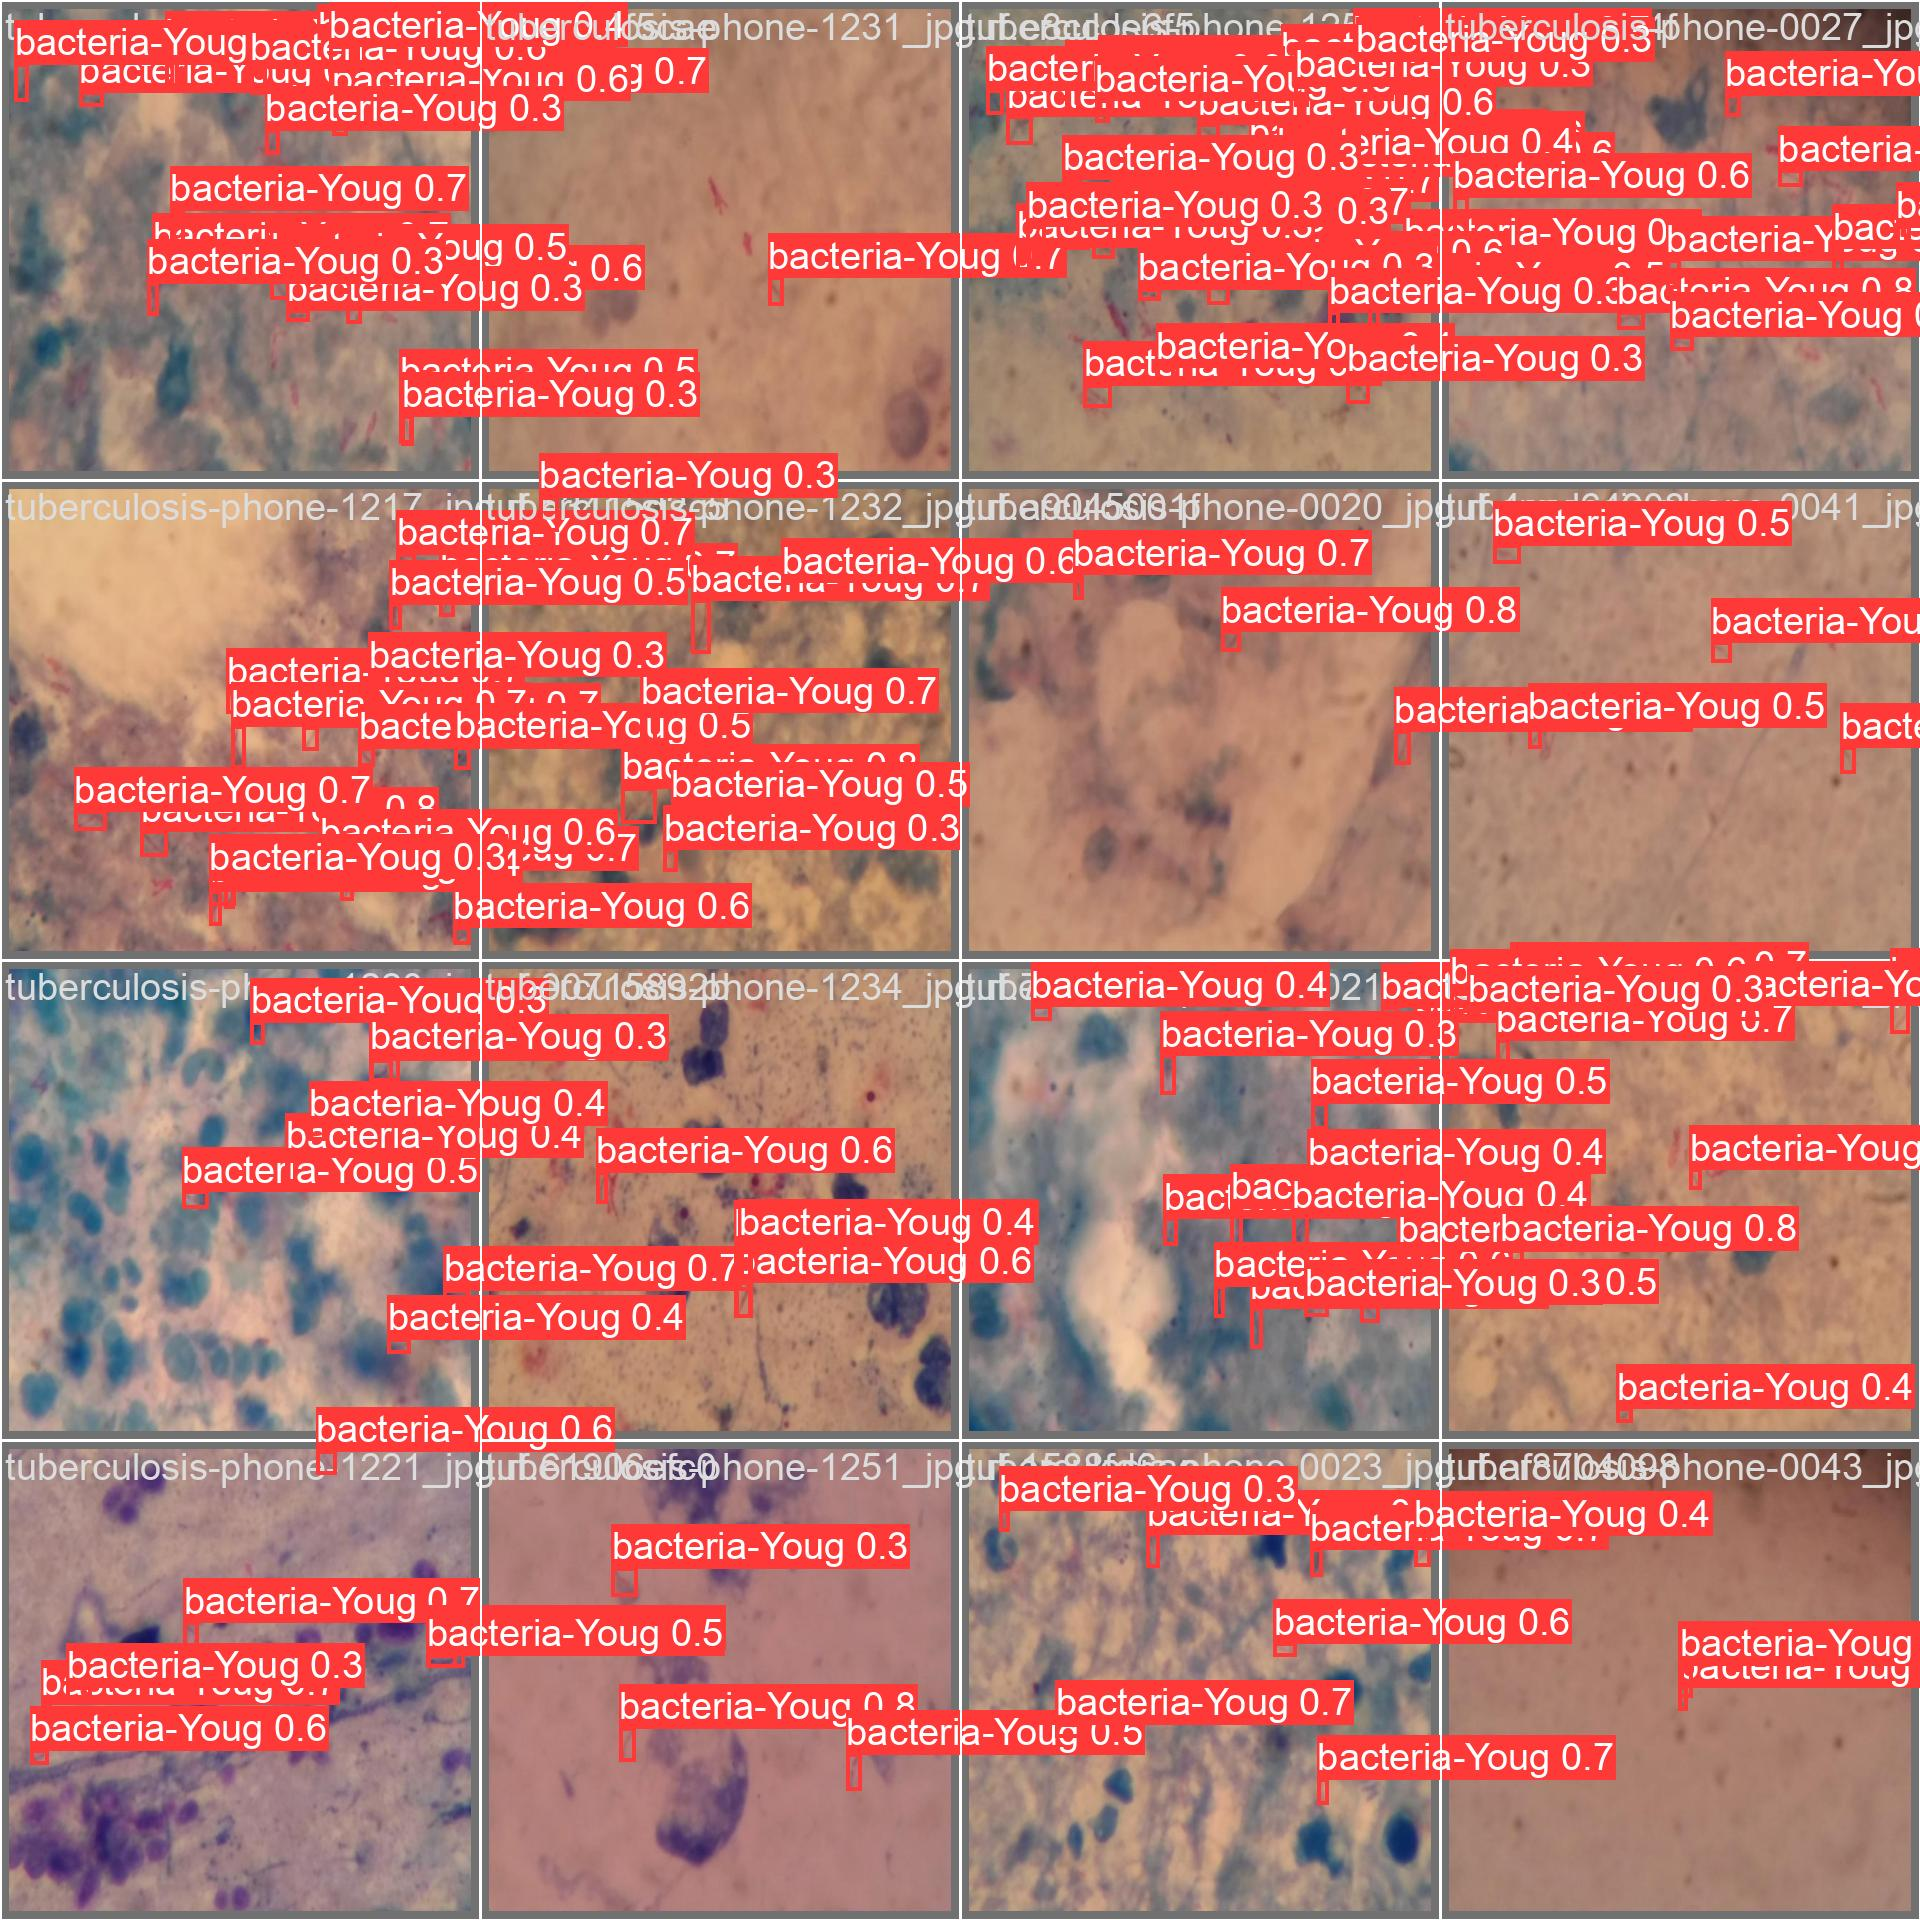

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [12]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content/drive/MyDrive/yolo2
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/yolo1-2/valid/labels.cache... 253 images, 10 backgrounds, 0 corrupt: 100% 253/253 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 16/16 [00:09<00:00,  1.66it/s]
                   all        253       2009      0.757      0.818      0.853      0.418
Speed: 1.3ms preprocess, 3.8ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


## Inference with Custom Model

In [13]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True show_labels=False show_conf=False

/content/drive/MyDrive/yolo2
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/126 /content/yolo1-2/test/images/tuberculosis-phone-0026_jpg.rf.d7800fe123ec3384ce82b4a3ebbf1220.jpg: 800x800 14 bacteria-Yougs, 7.2ms
image 2/126 /content/yolo1-2/test/images/tuberculosis-phone-0028_jpg.rf.e4a7eb444aabc0911cf1bec02427d509.jpg: 800x800 15 bacteria-Yougs, 7.7ms
image 3/126 /content/yolo1-2/test/images/tuberculosis-phone-0033_jpg.rf.9993623c538a0306b8a8fc2aa26f14f0.jpg: 800x800 5 bacteria-Yougs, 7.4ms
image 4/126 /content/yolo1-2/test/images/tuberculosis-phone-0049_jpg.rf.2b82f15f5a060e18396576045790a0c8.jpg: 800x800 6 bacteria-Yougs, 7.0ms
image 5/126 /content/yolo1-2/test/images/tuberculosis-phone-0053_jpg.rf.9d0483f1159cc945e041fb8e4b064684.jpg: 800x800 1 bacteria-Youg, 7.0ms
image 6/126 /content/yolo1-2/test/images/tuberculosis-phone-0064_jpg.rf.dfb24

**NOTE:** Let's take a look at few results.

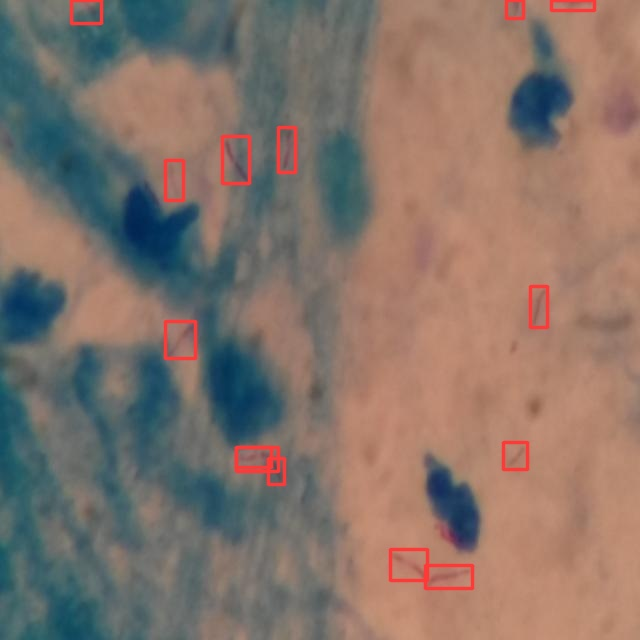

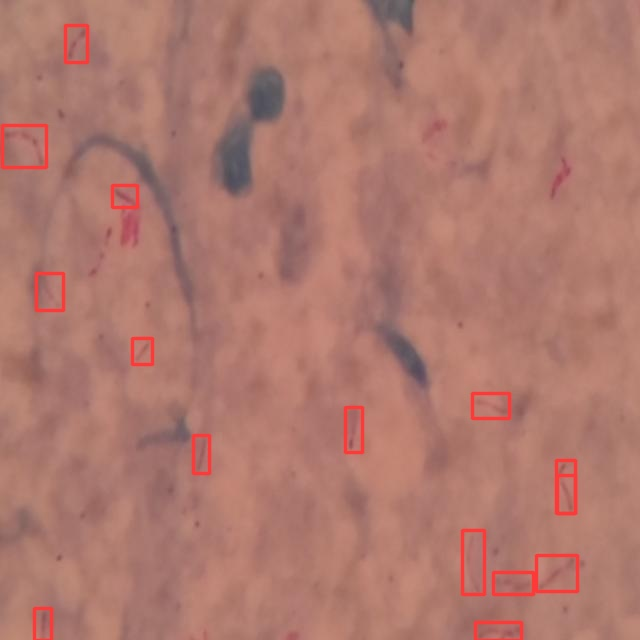

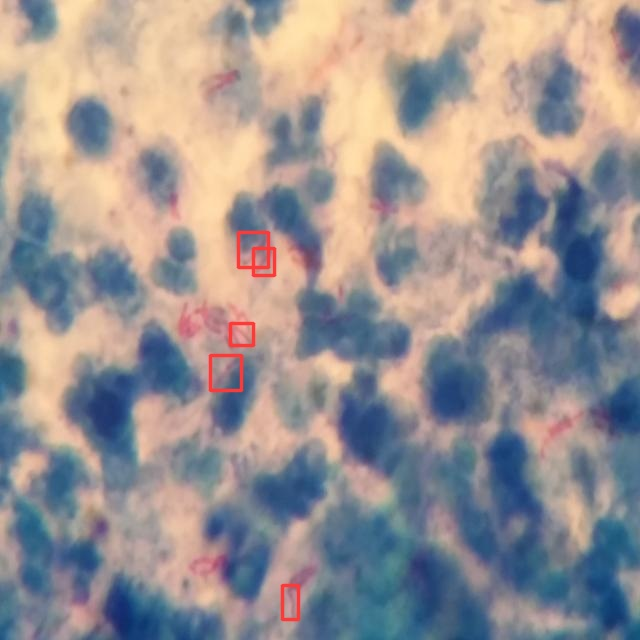

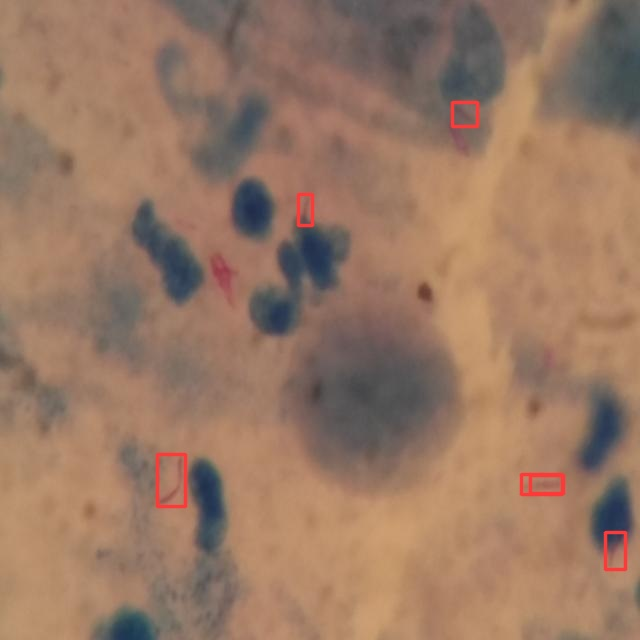

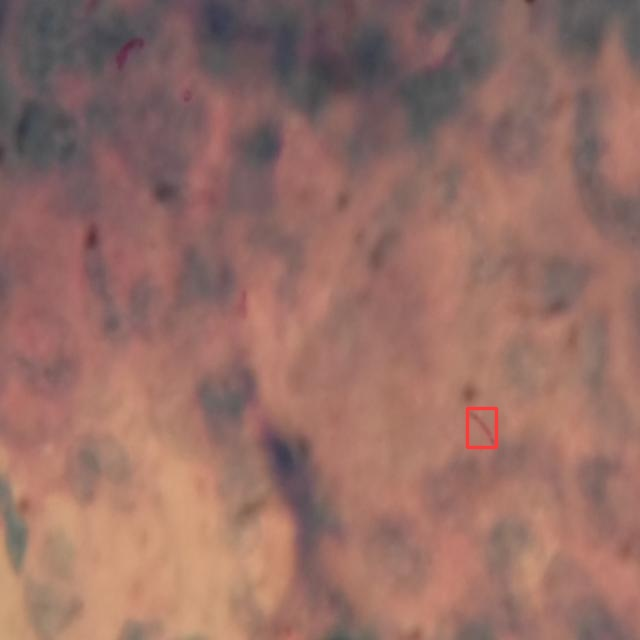

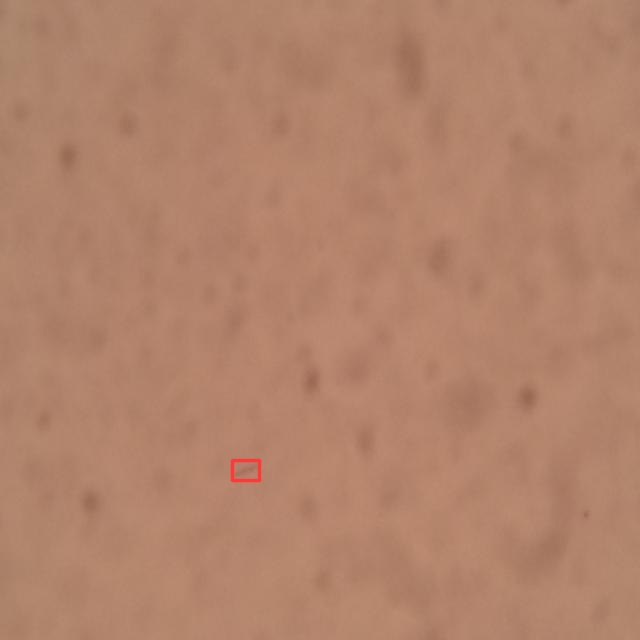

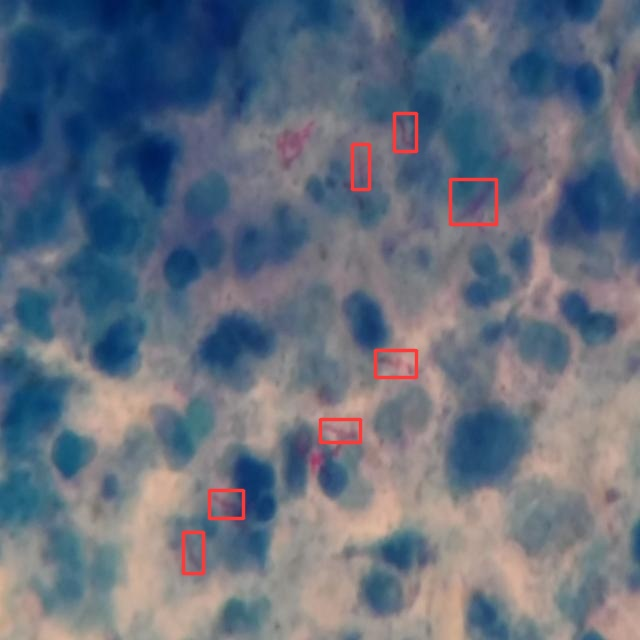

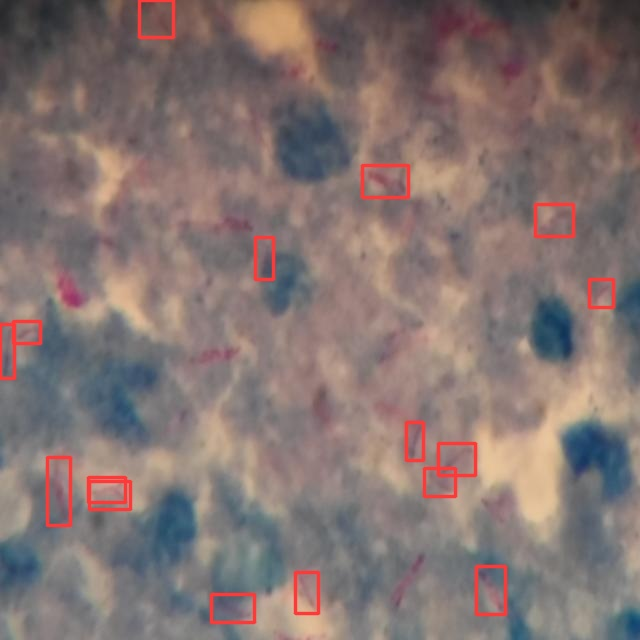

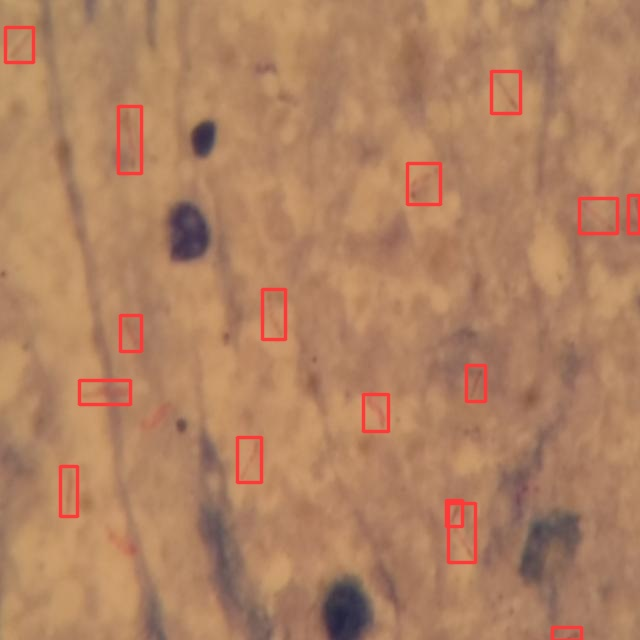

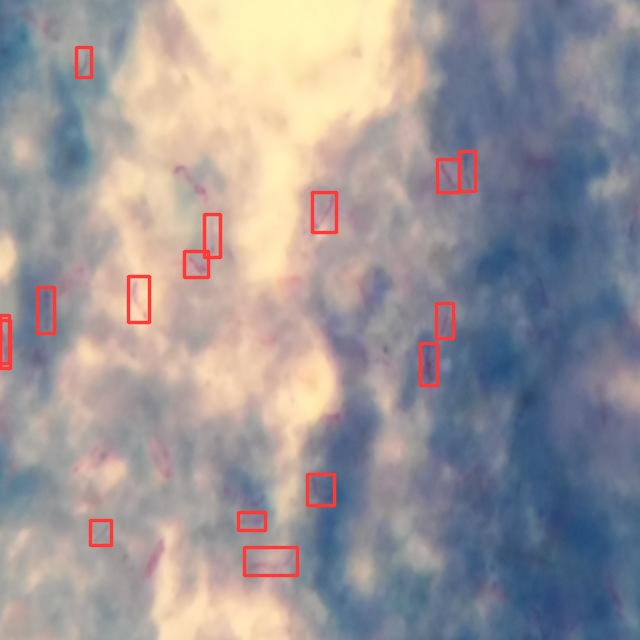

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [11]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/tb_all training save=True show_labels=False show_conf=False

/content/drive/MyDrive/yolo2
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 382, in entrypoint
    check_dict_alignment(full_args_dict, {a: ''})
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 203, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: 'training' is not a valid YOLO argument. Similar arguments are i.e. ['train'].

    Arguments received: ['yolo', 'task=detect', 'mode=predict', 'model=/content/drive/MyDrive/yolo2/runs/detect/train/weights/best.pt', 'conf=0.25', 'source=/content/drive/MyDrive/tb_all', 'training', 'save=True', 'show_labels=False', 'show_conf=False']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (requi

In [14]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/drive/MyDrive/tb_ieeedataport save=True show_labels=False show_conf=False

/content/drive/MyDrive/yolo2
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/383 /content/drive/MyDrive/tb_ieeedataport/HH1 (1).JPG: 608x800 (no detections), 72.3ms
image 2/383 /content/drive/MyDrive/tb_ieeedataport/HH1 (10).JPG: 608x800 (no detections), 18.6ms
image 3/383 /content/drive/MyDrive/tb_ieeedataport/HH1 (2).JPG: 608x800 (no detections), 18.6ms
image 4/383 /content/drive/MyDrive/tb_ieeedataport/HH1 (3).JPG: 608x800 (no detections), 18.6ms
image 5/383 /content/drive/MyDrive/tb_ieeedataport/HH1 (4).JPG: 608x800 (no detections), 18.6ms
image 6/383 /content/drive/MyDrive/tb_ieeedataport/HH1 (5).JPG: 608x800 3 bacteria-Yougs, 18.6ms
image 7/383 /content/drive/MyDrive/tb_ieeedataport/HH1 (6).JPG: 608x800 127 bacteria-Yougs, 18.6ms
image 8/383 /content/drive/MyDrive/tb_ieeedataport/HH1 (7).JPG: 608x800 83 bacteria-Yougs, 18.6ms
image 9/383 /content/drive

In [20]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/HH1 (7).jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")